# DATA CLEANING AND PREPROCESSING
There start **Data cleaning & Preprocessing** part  after **Data understanding** and **Eda** 
-  🔍 [Data Understanding](Loan_prediction_Data_understanding.ipynb)
-  📊[Exploratory Data Analysis (EDA)](Loan_prediction_eda_part.ipynb)

## Goals:
basically in this notebook,we clean and prepare the data before applying **Machine learning models**
- Handle missing Values
- correct data types
- Handle outliers if needed
- Encode Categorical variables
- Normalize or scale numerical values(if needed)

In [2]:
## import libraries and Data
import numpy as np
import pandas as pd

# Load dataset
df=pd.read_csv('train_loandataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
columns=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']
for col in columns:
    print(df[col].value_counts())

Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Yes    398
No     213
Name: count, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [6]:
# 3+ replace by 3
df['Dependents'].replace('3+', 3, inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5088\103550042.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].replace('3+', 3, inplace=True)


In [8]:
df['Dependents'].value_counts()

Dependents
0    345
1    102
2    101
3     51
Name: count, dtype: int64

In [10]:
# handle missing value
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# find missing values in some column
# Gender-13
# Married-3
# Dependents-15
# Self_Employed-32
# LoanAmount-22
# Loan_Amount_Term-14
# creadit_History-50

### 🔍 Missing Values Handling Summary:

We handled missing values using the following strategies:
- Mode for categorical columns (like Gender, Married)
- Median for numerical columns with skew (LoanAmount)
- Mode for critical features like `Credit_History` to avoid introducing bias

This step ensures that the dataset is ready for encoding and modeling without losing rows unnecessarily.

In [15]:
# so there i fill all missing value
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5088\1632975142.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5088\1632975142.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
# now check dtype and then handle if needed
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

###  Data Type Correction
To optimize performance and ensure correct interpretation of features:
- Categorical features like `Gender`, `Married`, `Education`, `Self_Employed`, and `Property_Area` are converted to `"category"` type.
- Numerical float features that are logically integers (`Dependents`,`ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, `Loan_Amount_Term`, `Credit_History`) are cast to `"int"`.
- Left `Loan_ID` unchanged as it's an identifier and won't be used for modeling

In [22]:
# Convert to 'category' type
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Convert numerical float columns to integer
int_columns = ['Dependents','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in int_columns:
    df[col] = df[col].astype(int)

# Check dtypes again
df.dtypes

Loan_ID                object
Gender               category
Married              category
Dependents              int32
Education            category
Self_Employed        category
ApplicantIncome         int32
CoapplicantIncome       int32
LoanAmount              int32
Loan_Amount_Term        int32
Credit_History          int32
Property_Area        category
Loan_Status            object
dtype: object

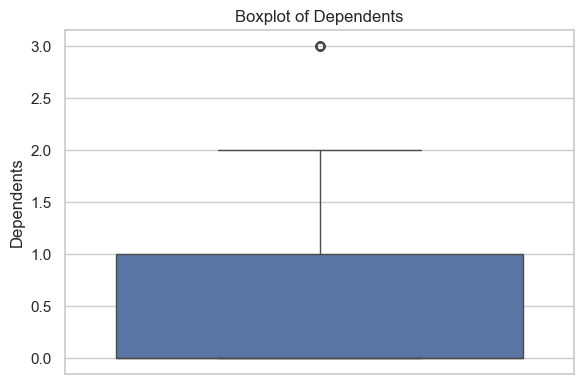

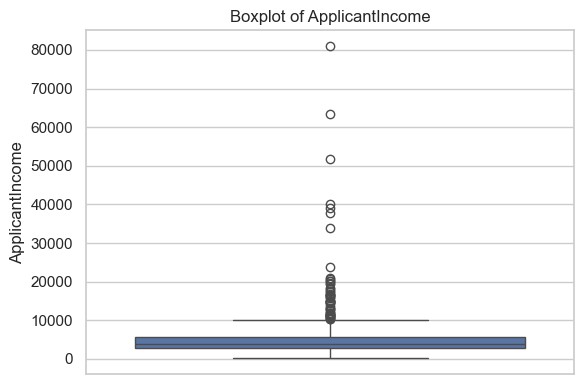

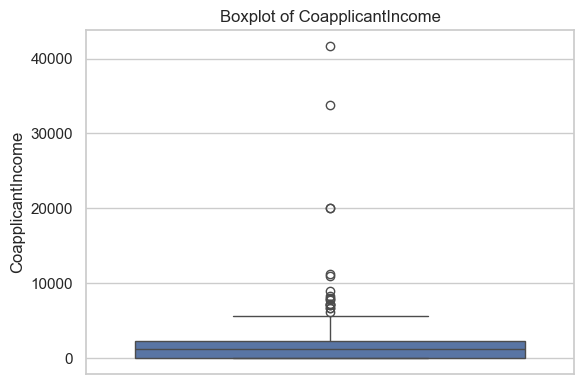

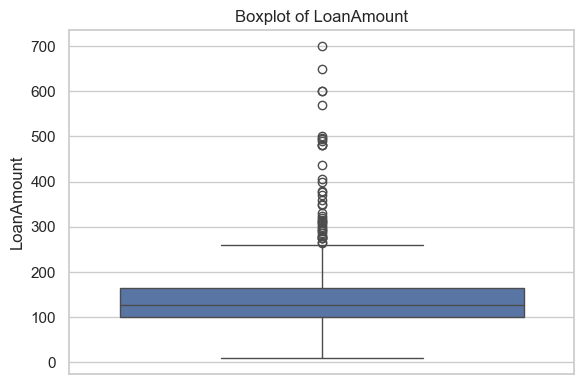

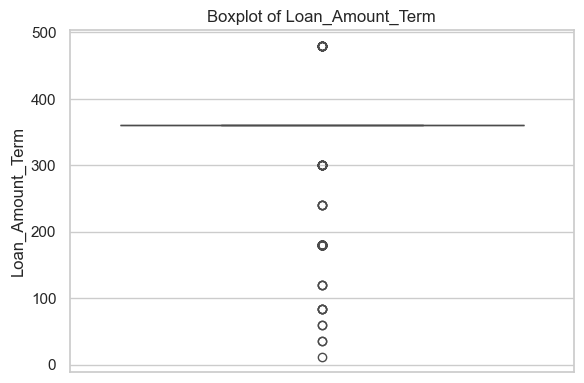

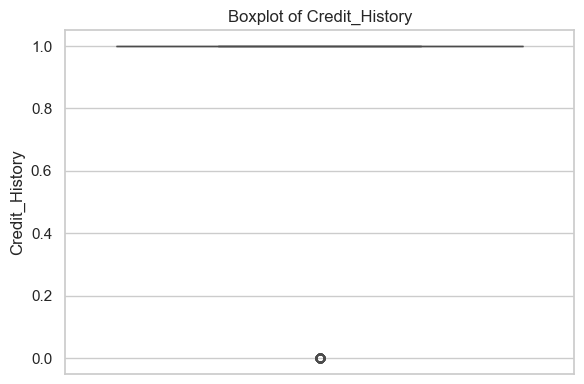

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'df' with your actual DataFrame name
numeric_cols = df.select_dtypes(include=['int32']).columns

# Set the plot style
sns.set(style="whitegrid")

# Loop through all numeric columns and plot boxplots
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


In [25]:
# manuallt check outliers
outlier_info = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_info[col] = len(outliers)
    
# Show number of outliers in each numeric column
outlier_info


{'Dependents': 51,
 'ApplicantIncome': 50,
 'CoapplicantIncome': 18,
 'LoanAmount': 41,
 'Loan_Amount_Term': 88,
 'Credit_History': 89}

In [26]:
# Capping outliers at 1st and 99th percentiles
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    lower_limit = df[col].quantile(0.01)
    upper_limit = df[col].quantile(0.99)
    df[col] = df[col].clip(lower_limit, upper_limit)


In [32]:
import numpy as np

# Apply log1p (log(1 + x)) to avoid log(0) issues
df['ApplicantIncome_log'] = np.log1p(df['ApplicantIncome'])
df['CoapplicantIncome_log'] = np.log1p(df['CoapplicantIncome'])

df['LoanAmount_log'] = np.log1p(df['LoanAmount'])


In [34]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360,1,Urban,Y,8.674197,0.000000,4.859812
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360,1,Rural,N,8.430327,7.319202,4.859812
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360,1,Urban,Y,8.006701,0.000000,4.204693
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360,1,Urban,Y,7.857094,7.765993,4.795791
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360,1,Urban,Y,8.699681,0.000000,4.955827


In [36]:
print(df.shape)  # Should be (614, X) where X = total columns after transformation


(614, 16)


In [38]:
# label encoding for binary Columns
label_map = {
    'Gender': {'Male': 1, 'Female': 0},
    'Married': {'Yes': 1, 'No': 0},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Self_Employed': {'Yes': 1, 'No': 0},
    'Loan_Status': {'Y': 1, 'N': 0}  # target variable
}

for col, mapping in label_map.items():
    df[col] = df[col].map(mapping)


In [40]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
0,LP001002,1,0,0,1,0,5849.0,0.0,128.0,360,1,Urban,1,8.674197,0.000000,4.859812
1,LP001003,1,1,1,1,0,4583.0,1508.0,128.0,360,1,Rural,0,8.430327,7.319202,4.859812
2,LP001005,1,1,0,1,1,3000.0,0.0,66.0,360,1,Urban,1,8.006701,0.000000,4.204693
3,LP001006,1,1,0,0,0,2583.0,2358.0,120.0,360,1,Urban,1,7.857094,7.765993,4.795791
4,LP001008,1,0,0,1,0,6000.0,0.0,141.0,360,1,Urban,1,8.699681,0.000000,4.955827


In [42]:
# One-Hot Encoding for Multi-Class Columns
df = pd.get_dummies(df, columns=['Property_Area', 'Dependents'], drop_first=True)


In [44]:
df.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3
0,LP001002,1,0,1,0,5849.0,0.0,128.0,360,1,1,8.674197,0.000000,4.859812,False,True,False,False,False
1,LP001003,1,1,1,0,4583.0,1508.0,128.0,360,1,0,8.430327,7.319202,4.859812,False,False,True,False,False
2,LP001005,1,1,1,1,3000.0,0.0,66.0,360,1,1,8.006701,0.000000,4.204693,False,True,False,False,False
3,LP001006,1,1,0,0,2583.0,2358.0,120.0,360,1,1,7.857094,7.765993,4.795791,False,True,False,False,False
4,LP001008,1,0,1,0,6000.0,0.0,141.0,360,1,1,8.699681,0.000000,4.955827,False,True,False,False,False


# Feature Engineering part start

In [47]:
# Models may perform better when both incomes are considered together.
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']
df['Total_Income_log'] = np.log1p(df['Total_Income'])

In [49]:
df.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3,Total_Income,Total_Income_log
0,LP001002,1,0,1,0,5849.0,0.0,128.0,360,1,...,8.674197,0.000000,4.859812,False,True,False,False,False,5849.0,8.674197
1,LP001003,1,1,1,0,4583.0,1508.0,128.0,360,1,...,8.430327,7.319202,4.859812,False,False,True,False,False,6091.0,8.714732
2,LP001005,1,1,1,1,3000.0,0.0,66.0,360,1,...,8.006701,0.000000,4.204693,False,True,False,False,False,3000.0,8.006701
3,LP001006,1,1,0,0,2583.0,2358.0,120.0,360,1,...,7.857094,7.765993,4.795791,False,True,False,False,False,4941.0,8.505525
4,LP001008,1,0,1,0,6000.0,0.0,141.0,360,1,...,8.699681,0.000000,4.955827,False,True,False,False,False,6000.0,8.699681


In [51]:
df.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3,Total_Income,Total_Income_log
0,LP001002,1,0,1,0,5849.0,0.0,128.0,360,1,...,8.674197,0.000000,4.859812,False,True,False,False,False,5849.0,8.674197
1,LP001003,1,1,1,0,4583.0,1508.0,128.0,360,1,...,8.430327,7.319202,4.859812,False,False,True,False,False,6091.0,8.714732
2,LP001005,1,1,1,1,3000.0,0.0,66.0,360,1,...,8.006701,0.000000,4.204693,False,True,False,False,False,3000.0,8.006701
3,LP001006,1,1,0,0,2583.0,2358.0,120.0,360,1,...,7.857094,7.765993,4.795791,False,True,False,False,False,4941.0,8.505525
4,LP001008,1,0,1,0,6000.0,0.0,141.0,360,1,...,8.699681,0.000000,4.955827,False,True,False,False,False,6000.0,8.699681


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Loan_ID                  614 non-null    object  
 1   Gender                   614 non-null    category
 2   Married                  614 non-null    category
 3   Education                614 non-null    category
 4   Self_Employed            614 non-null    category
 5   ApplicantIncome          614 non-null    float64 
 6   CoapplicantIncome        614 non-null    float64 
 7   LoanAmount               614 non-null    float64 
 8   Loan_Amount_Term         614 non-null    int32   
 9   Credit_History           614 non-null    int32   
 10  Loan_Status              614 non-null    int64   
 11  ApplicantIncome_log      614 non-null    float64 
 12  CoapplicantIncome_log    614 non-null    float64 
 13  LoanAmount_log           614 non-null    float64 
 14  Property_A

In [55]:
# EMI helps estimate affordability. Higher EMI compared to income may reduce eligibility.
df['EMI'] = df['LoanAmount'] / df['Loan_Amount_Term']


In [57]:
# Tells how much income is left after paying EMI — useful for judging risk.
df['Balance_Income'] = df['Total_Income'] - (df['EMI'] * 1000)  # if LoanAmount in thousands


In [59]:
df.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,LoanAmount_log,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3,Total_Income,Total_Income_log,EMI,Balance_Income
0,LP001002,1,0,1,0,5849.0,0.0,128.0,360,1,...,4.859812,False,True,False,False,False,5849.0,8.674197,0.355556,5493.444444
1,LP001003,1,1,1,0,4583.0,1508.0,128.0,360,1,...,4.859812,False,False,True,False,False,6091.0,8.714732,0.355556,5735.444444
2,LP001005,1,1,1,1,3000.0,0.0,66.0,360,1,...,4.204693,False,True,False,False,False,3000.0,8.006701,0.183333,2816.666667
3,LP001006,1,1,0,0,2583.0,2358.0,120.0,360,1,...,4.795791,False,True,False,False,False,4941.0,8.505525,0.333333,4607.666667
4,LP001008,1,0,1,0,6000.0,0.0,141.0,360,1,...,4.955827,False,True,False,False,False,6000.0,8.699681,0.391667,5608.333333


In [61]:
# Now drop raw columns
df.drop(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_Income'], axis=1, inplace=True)


In [63]:
df.head()

,Gender,Married,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3,Total_Income_log,EMI,Balance_Income
0,1,0,1,0,360,1,1,8.674197,0.000000,4.859812,False,True,False,False,False,8.674197,0.355556,5493.444444
1,1,1,1,0,360,1,0,8.430327,7.319202,4.859812,False,False,True,False,False,8.714732,0.355556,5735.444444
2,1,1,1,1,360,1,1,8.006701,0.000000,4.204693,False,True,False,False,False,8.006701,0.183333,2816.666667
3,1,1,0,0,360,1,1,7.857094,7.765993,4.795791,False,True,False,False,False,8.505525,0.333333,4607.666667
4,1,0,1,0,360,1,1,8.699681,0.000000,4.955827,False,True,False,False,False,8.699681,0.391667,5608.333333


In [65]:
from sklearn.model_selection import train_test_split

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training rows: {X_train.shape[0]}")
print(f"Testing rows: {X_test.shape[0]}")


Training rows: 491
Testing rows: 123


In [66]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8536585365853658


C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Confusion Matrix:
 [[21 17]
 [ 1 84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



In [71]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8292682926829268
Confusion Matrix:
 [[24 14]
 [ 7 78]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.63      0.70        38
           1       0.85      0.92      0.88        85

    accuracy                           0.83       123
   macro avg       0.81      0.77      0.79       123
weighted avg       0.83      0.83      0.82       123



# here comarison between Logistic Regression and Random Forest 

| Metric                  | Logistic Regression | Random Forest |
| ----------------------- | ------------------- | ------------ |
| **Accuracy**            | 0.85                | 0.84         |
| **Precision (Class 0)** | 0.95                | 0.78         |
| **Recall (Class 0)**    | 0.55                | 0.66         |
| **F1-Score (Class 0)**  | 0.70                | 0.71         |
| **Precision (Class 1)** | 0.83                | 0.86         |
| **Recall (Class 1)**    | 0.99                | 0.92         |
| **F1-Score (Class 1)**  | 0.90                | 0.89         |
| **Macro Avg F1-Score**  | 0.80                | 0.80         |
| **Weighted Avg F1**     | 0.84                | 0.83         |




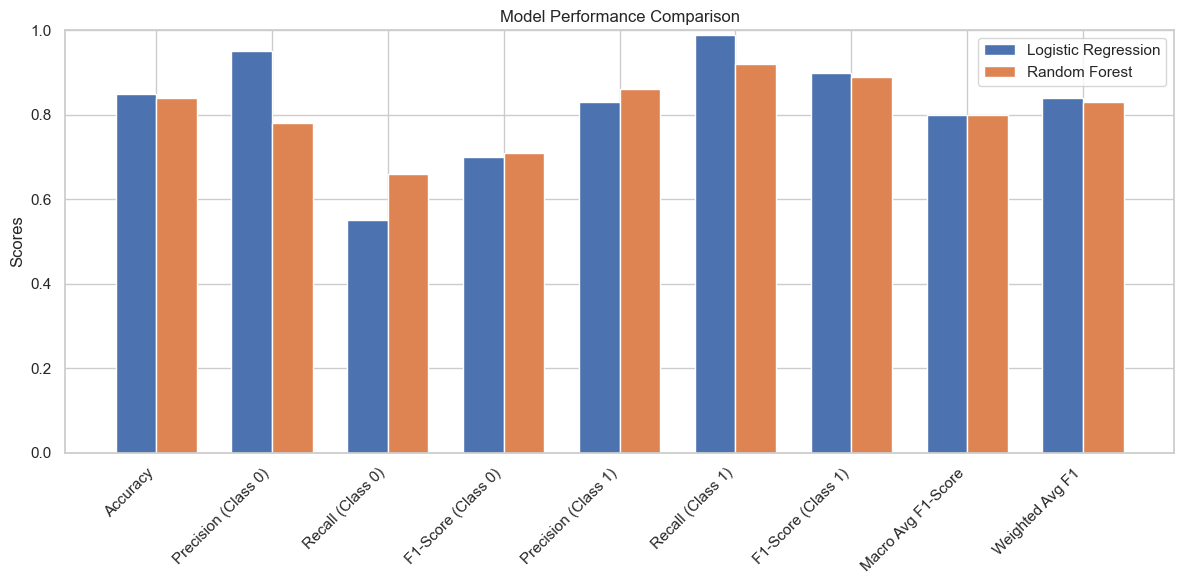

In [74]:
import matplotlib.pyplot as plt
import numpy as np

metrics = [
    "Accuracy", "Precision (Class 0)", "Recall (Class 0)", "F1-Score (Class 0)",
    "Precision (Class 1)", "Recall (Class 1)", "F1-Score (Class 1)",
    "Macro Avg F1-Score", "Weighted Avg F1"
]

logistic_scores = [0.85, 0.95, 0.55, 0.70, 0.83, 0.99, 0.90, 0.80, 0.84]
rf_scores = [0.84, 0.78, 0.66, 0.71, 0.86, 0.92, 0.89, 0.80, 0.83]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, logistic_scores, width, label='Logistic Regression')
rects2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45, ha='right')
ax.legend()

plt.ylim(0, 1)
plt.tight_layout()
plt.show()


# 📊 Model Performance Comparison
The chart above compares the performance of Logistic Regression and Random Forest Classifier across various evaluation metrics, including Accuracy, Precision, Recall, and F1-Scores for both classes.

🔍 Observations:
- Accuracy is almost the same for both models, around 85%.

- Precision (Class 0) is slightly better in Logistic Regression, but Recall (Class 0) is significantly better in Random Forest.

- For Class 1 (Loan Approved):

- Precision, Recall, and F1-Score are slightly better in Random Forest, indicating better identification of approved loan cases.

- Macro and Weighted Average F1-Scores are very close, with Logistic Regression slightly ahead on Macro Avg and Random Forest nearly matching it.

# ✅ Conclusion:
Both models perform competitively, but Random Forest shows more balanced recall and F1-scores, especially for Class 0, making it a better choice when minimizing false negatives (i.e., predicting approved when actually rejected) is important.

👉 Based on this analysis, Random Forest was selected as the final model for deployment.

In [78]:
best_model=model

In [81]:
import joblib
joblib.dump(best_model,'loan_eligibility_model.pkl')

['loan_eligibility_model.pkl']

In [85]:
import pickle
pickle.dump(model, open('random_forest_model.pkl', 'wb'))


In [87]:
import os
os.listdir()

['.ipynb_checkpoints',
 'loan_eligibility_model.pkl',
 'loan_prediction.ipynb',
 'Loan_prediction_Data_understanding.ipynb',
 'Loan_prediction_eda_part.ipynb',
 'random_forest_model.pkl',
 'train_loandataset.csv']

In [89]:
import os
os.getcwd()


'C:\\Users\\LENOVO\\100 days of ml\\Loan_Eligibility_Predictor'